In [28]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [29]:
# Load data
breast_cancer = pd.read_csv("Datasets/breast_cancer.csv", sep=',',
                            names=['id', 'Clump_Thickness', 'Size', 'Shape', 'Marginal_Adhesion',
                                   'Epithelial_size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli',
                                   'Mitoses', 'Class'])

# see the first 10 rows to check if read correctly
breast_cancer.head(n=10)

id  Clump_Thickness  Size  Shape  Marginal_Adhesion  Epithelial_size  \
0  1000025                5     1      1                  1                2   
1  1002945                5     4      4                  5                7   
2  1015425                3     1      1                  1                2   
3  1016277                6     8      8                  1                3   
4  1017023                4     1      1                  3                2   
5  1017122                8    10     10                  8                7   
6  1018099                1     1      1                  1                2   
7  1018561                2     1      2                  1                2   
8  1033078                2     1      1                  1                2   
9  1033078                4     2      1                  1                2   

  Bare_Nuclei  Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0           1                3                1        1      2  
1          10                3                2        1      2  
2           2                3                1        1      2  
3           4                3                7        1      2  
4           1                3                1        1      2  
5          10                9                7        1      4  
6          10                3                1        1      2  
7           1                3                1        1      2  
8           1                1                1        5      2  
9           1                2                1        1      2

In [30]:
# Convert benign and malignant to 0 and 1, respectively
condition = [(breast_cancer['Class'] == 2), (breast_cancer['Class'] == 4)]
breast_cancer['Class'] = np.select(condition, [0, 1])

In [31]:
print("--------------This is the end of loading dataset--------------")

--------------This is the end of loading dataset--------------


In [32]:
# Clean the data. Are there any missing or malformed features?
# Clean the data(delete data with "?" features)
breast_cancer = breast_cancer[breast_cancer.Bare_Nuclei != '?']

breast_cancer.Bare_Nuclei = breast_cancer.Bare_Nuclei.apply(int)

# sort to drop duplicates
breast_cancer.sort_values("id", inplace=True)
# drop duplicates
breast_cancer.drop_duplicates(keep='first', inplace=True)

# drop ID
breast_cancer = breast_cancer.drop(columns="id")

In [33]:
# 2.check if any value is <0
np.any((breast_cancer < 0))
# we may conclude that the data from this set are good since no cell is negative and null

False

In [34]:
print("--------------This is the end of preprocessing and checking data --------------")

--------------This is the end of preprocessing and checking data --------------


In [35]:
# Here is the summary of this dataset
breast_cancer.describe()

Clump_Thickness        Size       Shape  Marginal_Adhesion  \
count       675.000000  675.000000  675.000000         675.000000   
mean          4.451852    3.146667    3.208889           2.848889   
std           2.820859    3.055005    2.976552           2.875917   
min           1.000000    1.000000    1.000000           1.000000   
25%           2.000000    1.000000    1.000000           1.000000   
50%           4.000000    1.000000    1.000000           1.000000   
75%           6.000000    5.000000    5.000000           4.000000   
max          10.000000   10.000000   10.000000          10.000000   

       Epithelial_size  Bare_Nuclei  Bland_Chromatin  Normal_Nucleoli  \
count       675.000000   675.000000       675.000000       675.000000   
mean          3.229630     3.537778         3.442963         2.885926   
std           2.208497     3.637871         2.453894         3.065607   
min           1.000000     1.000000         1.000000         1.000000   
25%           2.000000     1.000000         2.000000         1.000000   
50%           2.000000     1.000000         3.000000         1.000000   
75%           4.000000     6.000000         5.000000         4.000000   
max          10.000000    10.000000        10.000000        10.000000   

          Mitoses       Class  
count  675.000000  675.000000  
mean     1.607407    0.349630  
std      1.741006    0.477207  
min      1.000000    0.000000  
25%      1.000000    0.000000  
50%      1.000000    0.000000  
75%      1.000000    1.000000  
max     10.000000    1.000000

In [36]:
# see the sample mean of each feature according to the Class 
breast_cancer.groupby('Class').mean()

Clump_Thickness      Size     Shape  Marginal_Adhesion  \
Class                                                           
0             2.972665  1.309795  1.419134           1.350797   
1             7.203390  6.563559  6.538136           5.635593   

       Epithelial_size  Bare_Nuclei  Bland_Chromatin  Normal_Nucleoli  \
Class                                                                   
0             2.113895     1.350797         2.079727         1.264237   
1             5.305085     7.605932         5.978814         5.902542   

        Mitoses  
Class            
0      1.066059  
1      2.614407

In [37]:
# see the sample std of each feature according to the Class 
breast_cancer.groupby('Class').std()

Clump_Thickness      Size     Shape  Marginal_Adhesion  \
Class                                                           
0             1.671458  0.859898  0.961448           0.921555   
1             2.434012  2.713282  2.563788           3.185513   

       Epithelial_size  Bare_Nuclei  Bland_Chromatin  Normal_Nucleoli  \
Class                                                                   
0             0.878855     1.183966         1.064377         0.959629   
1             2.428583     3.128695         2.286774         3.344579   

        Mitoses  
Class            
0      0.512591  
1      2.576416

In [38]:
# correlation map 
plt.figure(figsize=(16, 8))
sns.heatmap(breast_cancer.corr(), annot=True,  cmap="coolwarm")
# we can see that almost all features have high correlation with 'Class'

[Text(0.5, 0, 'Clump Thickness'),
 Text(0.5, 1.0, 'the distribution of Clump Thickness')]

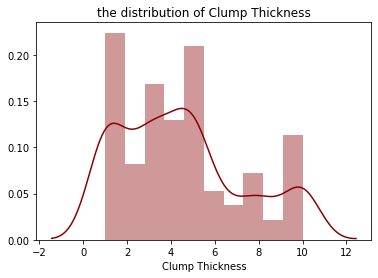

In [39]:
# the distribution of Clump Thickness
ct_dp = sns.distplot(breast_cancer.Clump_Thickness, hist=True, kde=True, color='darkred')
ct_dp.set(xlabel='Clump Thickness', title='the distribution of Clump Thickness')

[Text(0.5, 0, 'Size'), Text(0.5, 1.0, 'the distribution of Size')]

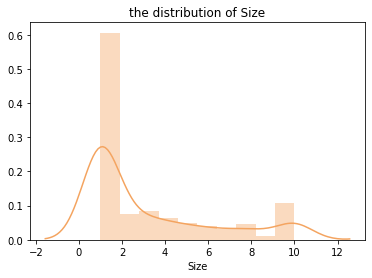

In [40]:
# the distribution of Size
size_dp = sns.distplot(breast_cancer.Size, hist=True, kde=True, color='sandybrown')
size_dp.set(xlabel='Size', title='the distribution of Size')

In [41]:
# the distribution of Shape
shape_dp = sns.distplot(breast_cancer.Shape, hist=True, kde=True, color='seagreen')
shape_dp.set(xlabel='Shape', title='the distribution of Shape')

[Text(0.5, 0, 'Shape'), Text(0.5, 1.0, 'the distribution of Shape')]

In [42]:
# the distribution of Marginal Adhesion
ma_dp = sns.distplot(breast_cancer.Marginal_Adhesion, hist=True, kde=True, color='navy')
size_dp.set(xlabel='Marginal Adhesion', title='the distribution of Marginal Adhesion')

[Text(0.5, 17.200000000000003, 'Marginal Adhesion'),
 Text(0.5, 1, 'the distribution of Marginal Adhesion')]

[Text(0.5, 0, 'Epithelial Size'),
 Text(0.5, 1.0, 'the distribution of Epithelial Size')]

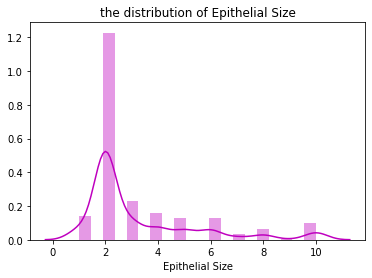

In [43]:
# the distribution of Epithelial size
size_dp = sns.distplot(breast_cancer.Epithelial_size, hist=True, kde=True, color='m')
size_dp.set(xlabel='Epithelial Size', title='the distribution of Epithelial Size')

[Text(0.5, 0, 'Bare Nuclei'),
 Text(0.5, 1.0, 'the distribution of Bare Nuclei')]

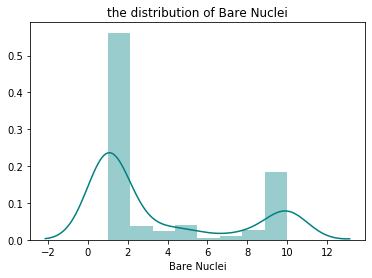

In [44]:
# the distribution of Bare Nuclei
bc_dp = sns.distplot(breast_cancer.Bare_Nuclei, hist=True, kde=True, color='teal')
bc_dp.set(xlabel='Bare Nuclei', title='the distribution of Bare Nuclei')

[Text(0.5, 0, 'Bland Chromatin'),
 Text(0.5, 1.0, 'the distribution of Bland Chromatin')]

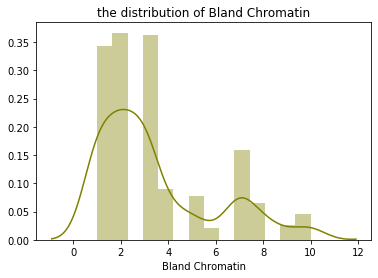

In [45]:
# the distribution of Bland Chromatin
bc_dp = sns.distplot(breast_cancer.Bland_Chromatin, hist=True, kde=True, color='olive')
bc_dp.set(xlabel='Bland Chromatin', title='the distribution of Bland Chromatin')

[Text(0.5, 0, 'Normal Nucleoli'),
 Text(0.5, 1.0, 'the distribution of Normal Nucleoli')]

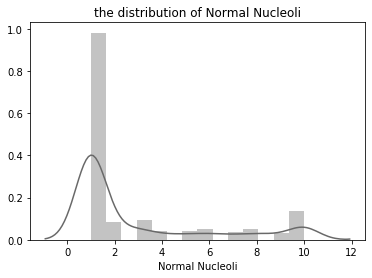

In [46]:
# the distribution of Normal Nucleoli
nn_dp = sns.distplot(breast_cancer.Normal_Nucleoli, hist=True, kde=True, color='dimgrey')
nn_dp.set(xlabel='Normal Nucleoli', title='the distribution of Normal Nucleoli')

In [47]:
# the distribution of Mitoses
mitoses_dp = sns.distplot(breast_cancer.Mitoses, hist=True, kde=True, color='gold')
mitoses_dp.set(xlabel='Mitoses', title='the distribution of Mitoses')

[Text(0.5, 0, 'Mitoses'), Text(0.5, 1.0, 'the distribution of Mitoses')]